The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score



In [74]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(r"C:\Users\csaru\Downloads\car_age_price.csv")
df.columns


Index(['Year', 'Price'], dtype='object')

In [75]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


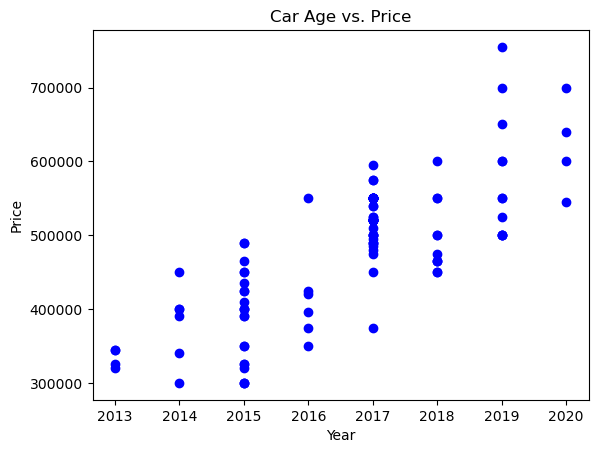

In [76]:
# Plot the data
plt.scatter(df['Year'], df['Price'], color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Age vs. Price')
plt.show()

In [81]:
# Split the dataset into input features (year) and output labels (price)
X = df['Year'].values.reshape(-1,1)
y = df['Price'].values

In [82]:
# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)


LinearRegression()

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print("Linear Regression MSE:", linear_mse)
print()

Linear Regression MSE: 3962573261.894448



In [87]:
# Make predictions using the linear regression model
y_pred = linear_reg.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3344297105.276684


In [88]:
# Train and evaluate the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print("Linear Regression MSE:", linear_mse)

Linear Regression MSE: 3962573261.894448


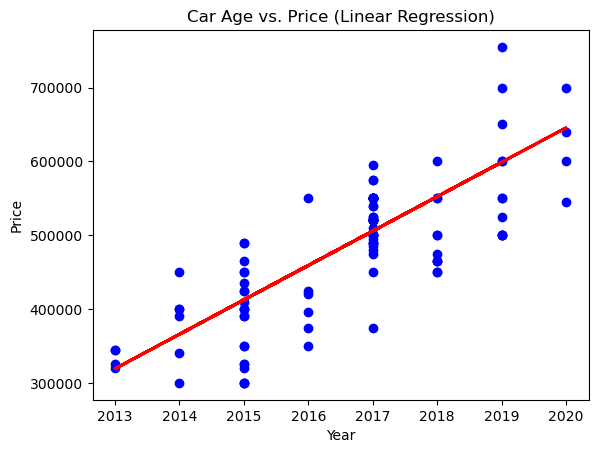

In [89]:
# Plot the linear regression line
plt.scatter(df['Year'], df['Price'], color='blue')
plt.plot(df['Year'], y_pred, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Age vs. Price (Linear Regression)')
plt.show()

In [90]:
# Train and evaluate the Lasso Regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 3962549680.6533012


In [93]:
# Compare the model performances
if linear_mse < lasso_mse:
    print("Linear Regression performs better.")
elif lasso_mse < linear_mse:
    print("Lasso Regression performs better.")
else:
    print("Both models have the same performance.")

Lasso Regression performs better.


Predicted price of a 2022 model (Linear Regression): 738670.6582984775
Predicted price of a 2022 model (Lasso Regression): 738668.4670252949


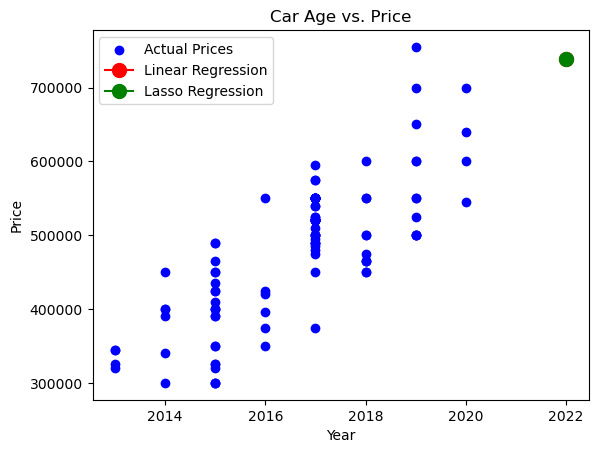

In [94]:
# Predict the price for a 2022 model using Linear Regression
price_linear = linear_reg.predict([[2022]])
print("Predicted price of a 2022 model (Linear Regression):", price_linear[0])

# Predict the price for a 2022 model using Lasso Regression
price_lasso = lasso_reg.predict([[2022]])
print("Predicted price of a 2022 model (Lasso Regression):", price_lasso[0])

# Plot the predicted prices for the 2022 model
plt.scatter(df['Year'], df['Price'], color='blue', label='Actual Prices')
plt.plot(2022, price_linear, color='red', marker='o', markersize=10, label='Linear Regression')
plt.plot(2022, price_lasso, color='green', marker='o', markersize=10, label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Age vs. Price')
plt.legend()
plt.show()

